Wilson-Polchinski equations in 1+0D,
$$W[J, \Lambda] = \int_{x(\omega) \: st. \: \omega < \Lambda} Dx Dx^q \: e^{-iS[x, x^q, \Lambda] + J(\omega) x(\omega)}$$
$$\partial_\Lambda W[J, \Lambda] = 0$$
$$S[\phi, \Lambda] = \int dt \: 2i x^q(t)(\partial_t x(t) - A(x(t))) + 2 B(x(t))B(x(t))^T (x^q)^2$$

In [32]:
using ModelingToolkit, StochasticDiffEq
using ModelingToolkit: t_nounits as t, D_nounits as D

@parameters λrel κ Δc ωz Nspin
@brownian ξ1 ξ2
@variables begin
    x(t) = 0.0
    y(t) = 0.0
    Sx(t) = 0.0
    Sy(t) = 0.0
    Sz(t) = -Nspin/2.0
    Qx(t) = 0.0
    Qy(t) = 0.0
end
λ = 1 / 2 * sqrt((Δc^2 + κ^2) / Δc * ωz) * λrel
eqs = [D(x) ~ Δc*y-κ*x + sqrt(κ/2)*ξ1,
    D(y) ~ -Δc*x-κ*y - 2*λ/sqrt(Nspin)*Sx + sqrt(κ/2)*ξ2,
    D(Sx) ~ -ωz*Sy,
    D(Sy) ~ ωz*Sx - 2*λ/sqrt(Nspin)*x*Sz,
    D(Sz) ~ 2*λ/sqrt(Nspin)*x*Sy,
    D(Qx) ~ sqrt(2*κ)*x + ξ1,
    D(Qy) ~ sqrt(2*κ)*y + ξ2]
@mtkbuild dicke_model = System(eqs, t)

Model dicke_model with 7 equations
Unknowns (7):
  x(t) [defaults to 0.0]
  y(t) [defaults to 0.0]
  Sx(t) [defaults to 0.0]
  Sy(t) [defaults to 0.0]
  Sz(t) [defaults to -0.5Nspin]
  Qx(t) [defaults to 0.0]
⋮
Parameters (5):
  κ
  Δc
  ωz
  Nspin
  λrel

In [29]:
u0map = [x => 0.0,
y => 0.0,
Sx => 0.0,
Sy => 0.0,
Sz => -Nspin/2.0,
Qx => 0.0,
Qy => 0.0]

paramap = [λrel => 1.1, κ => 2π * 0.15, Δc => 2π * 20, ωz => 2π * 0.01, Nspin => 10_000]

prob = SDEProblem(dicke_model, u0map, (0.0, 10.0), paramap)
sol = solve(prob, LambaEulerHeun(), save_noise=true)

retcode: Success
Interpolation: 1st order linear
t: 5080-element Vector{Float64}:
  0.0
  9.988642414596646e-8
  2.1225865131017875e-7
  3.386774068699176e-7
  4.808985068746238e-7
  6.408972443799182e-7
  8.208958240733746e-7
  1.023394226228513e-6
  1.2512049286530436e-6
  1.5074919688806407e-6
  1.7958148891366873e-6
  2.12017817442474e-6
  2.4850868703737988e-6
  ⋮
  9.975386335066199
  9.977542814219392
  9.97963069684192
  9.981979564792264
  9.984030670163103
  9.986338163705296
  9.988927661893003
  9.991051498837317
  9.993440815399671
  9.995490989051294
  9.997797434409371
 10.0
u: 5080-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, -5000.0, 0.0, 0.0]
 [-0.0001919614409071629, 1.2918483048418065e-5, 0.0, -1.4817005608305274e-9, -5000.0, -0.0002796363724180326, 1.8817004600157928e-5]
 [-1.2316576385010359e-5, -3.419673797779142e-5, 2.2230955459237444e-17, -3.2555619029063682e-9, -5000.0, -1.794189869629652e-5, -4.981931413162741e-5]
 [-0.0003323647900316629, -0.000453

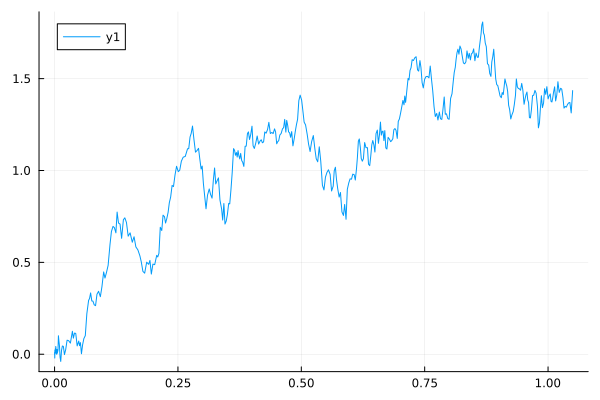

In [33]:
using Plots
plot(sol.t[1:500], sol[dicke_model.Qx][1:500])
# plot(sol.t, sol[dicke_model.y])

In [35]:
sol.W

t: 2-element Vector{Float64}:
  0.0
 10.0
u: 2-element Vector{Vector{Float64}}:
 [0.0, 0.0]
 [-2.799528791289336, -4.286782823203423]

In [34]:
plot(sol.t[1:500], sol.W.u[1:500])

LoadError: BoundsError: attempt to access 2-element Vector{Vector{Float64}} at index [1:500]

In [9]:
typeof(fol.x)

Num